In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [4]:
#read data from input file csv
file_path = '../input/house-prices-advanced-regression-techniques'
train_df = pd.read_csv(f'{file_path}/train.csv')
train_df.set_index('Id', inplace=True)

#Loading test data
test_df = pd.read_csv(f'{file_path}/test.csv')
test_df.set_index('Id', inplace=True)

In [2]:
%matplotlib inline
import numpy as np
from scipy import stats
import scipy.stats as norm
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
print('Dimensions :',train_df.shape)
print('Dimensions :',test_df.shape)
train_df.head()

Dimensions : (1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<AxesSubplot:>

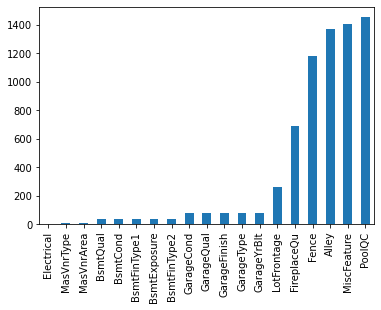

In [6]:
#hp_df[hp_df.duplicated()].count()
missing_data = train_df.isnull().sum()
missing_data = missing_data[missing_data>0]
missing_data.sort_values(inplace=True)
missing_data.plot.bar()

In [ ]:
import pandas_profiling as pp
profile_report = pp.ProfileReport(train_df,minimal=True)
profile_report

In [7]:
#FireplaceQu  has 47.3% missing data, PoolQC is 99.5% missing, Fence 80.8% and MiscFeature 96.3%, Alley 93.8%
# MiscVal has skewed zeros : 96.4%
train_df =train_df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)
test_df =test_df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

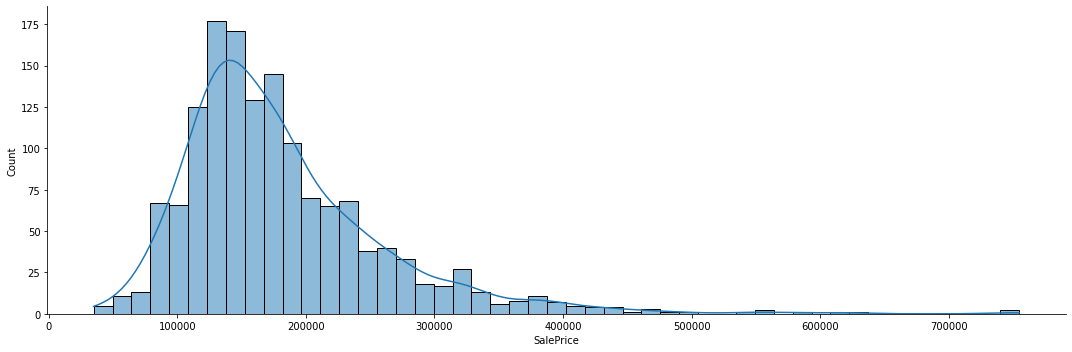

In [8]:
sns.displot(data=train_df, x="SalePrice", kde=True, height = 5, aspect=3)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([-1.83870376, -1.83352844, -1.80092766, ...,  5.59185509,
          7.10289909,  7.22881942])),
 (0.9338272640436482, 3.011653511629684e-16, 0.931966564151299))

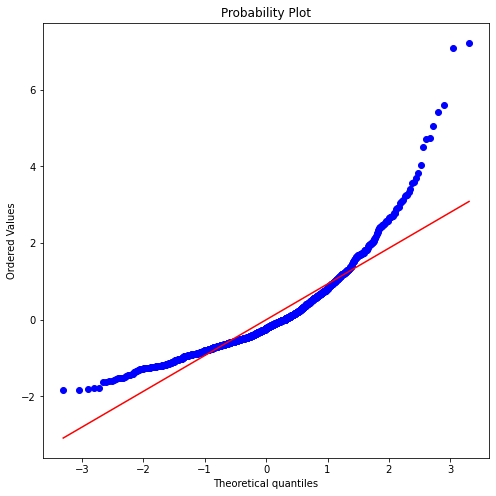

In [6]:
# print(stats.norm.__doc__)
fig, ax =plt.subplots(figsize=(8,8))
zscores = stats.zscore(train_df['SalePrice'].to_numpy())
stats.probplot(zscores,plot=ax)

We certainly cannot use linear regression here. Now see the correlation between the numerical columns first****

In [8]:
# importing date class from datetime module
from datetime import date
train_df['YrOld'] =  date.today().year -  train_df['YearBuilt']

test_df['YrOld'] =  date.today().year -  test_df['YearBuilt']

In [9]:
#Fetch numerical and categorical columns
train_nm = train_df.select_dtypes(include=['float64','int64'])
train_nm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

<AxesSubplot:>

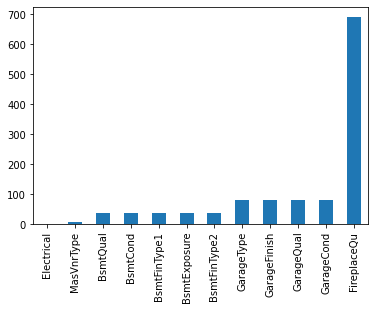

In [12]:
train_cat = train_df.select_dtypes(include=['object'])
train_tr = pd.merge(train_cat,train_df['SalePrice'],how='inner', on='Id')
missing_data = train_tr.isnull().sum()
missing_data = missing_data[missing_data>0]
missing_data.sort_values(inplace=True)
missing_data.plot.bar()

In [ ]:
train_cat

In [11]:
#Let's first fill missing values for numerical data and scale this data

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(train_df.select_dtypes(include=['object']))
imputer.statistics_
X = imputer.transform(train_df.select_dtypes(include=['object']))
train_tr = pd.DataFrame(X,columns=train_df.select_dtypes(include=['object']).columns)
missing_data = train_tr.isnull().sum()
missing_data = missing_data[missing_data>0]
missing_data

Series([], dtype: int64)

In [14]:
X

array([['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'IR1', ..., 'Y', 'WD', 'Normal'],
       ...,
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal']], dtype=object)

In [ ]:
train_df.select_dtypes(include=['object'])

In [ ]:
#Let's first fill missing values for numerical data and scale this data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(train_tr)
imputer.statistics_
X = imputer.transform(train_tr)
train_tr = pd.DataFrame(X,columns=train_tr.columns)
missing_data = train_tr.isnull().sum()
missing_data = missing_data[missing_data>0]
missing_data

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['MSZoning'] = le.fit_transform(list(train_df['MSZoning']))
train_df['Street'] = le.fit_transform(list(train_df['Street']))
train_df['LotShape'] = le.fit_transform(list(train_df['LotShape']))
train_df['LandContour'] = le.fit_transform(list(train_df['LandContour']))
train_df['LotConfig'] = le.fit_transform(list(train_df['LotConfig']))
train_df['Utilities'] = le.fit_transform(list(train_df['Utilities']))
train_df['Neighborhood'] = le.fit_transform(list(train_df['Neighborhood']))
train_df['HouseStyle'] = le.fit_transform(list(train_df['HouseStyle']))
train_df['RoofStyle'] = le.fit_transform(list(train_df['RoofStyle']))
train_df['ExterQual'] = le.fit_transform(list(train_df['ExterQual']))

In [45]:
train_df['SalePrice'].sort_values(ascending=True).unique()

array([ 34900,  35311,  37900,  39300,  40000,  52000,  52500,  55000,
        55993,  58500,  60000,  61000,  62383,  64500,  66500,  67000,
        68400,  68500,  72500,  73000,  75000,  75500,  76000,  76500,
        78000,  79000,  79500,  79900,  80000,  80500,  81000,  82000,
        82500,  83000,  83500,  84000,  84500,  84900,  85000,  85400,
        85500,  86000,  87000,  87500,  88000,  89000,  89471,  89500,
        90000,  90350,  91000,  91300,  91500,  92000,  92900,  93000,
        93500,  94000,  94500,  94750,  95000,  96500,  97000,  97500,
        98000,  98300,  98600,  99500,  99900, 100000, 101000, 101800,
       102000, 102776, 103000, 103200, 103600, 104000, 104900, 105000,
       105500, 105900, 106000, 106250, 106500, 107000, 107400, 107500,
       107900, 108000, 108480, 108500, 108959, 109000, 109008, 109500,
       109900, 110000, 110500, 111000, 111250, 112000, 112500, 113000,
       114500, 114504, 115000, 116000, 116050, 116500, 116900, 117000,
      

In [12]:
train_tr['SalePriceCat'] =  pd.cut(np.array(train_df['SalePrice']),10,precision=0)

In [13]:
train_tr.head(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,SalePriceCat
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,208500,"(178920.0, 250930.0]"
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,Y,WD,Normal,181500,"(178920.0, 250930.0]"
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,WD,Normal,223500,"(178920.0, 250930.0]"
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000,"(106910.0, 178920.0]"
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,WD,Normal,250000,"(178920.0, 250930.0]"
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Gd,Attchd,Unf,TA,TA,Y,WD,Normal,143000,"(106910.0, 178920.0]"
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,307000,"(250930.0, 322940.0]"
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,TA,Attchd,RFn,TA,TA,Y,WD,Normal,200000,"(178920.0, 250930.0]"
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,TA,Detchd,Unf,Fa,TA,Y,WD,Abnorml,129900,"(106910.0, 178920.0]"
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,TA,Attchd,RFn,Gd,TA,Y,WD,Normal,118000,"(106910.0, 178920.0]"


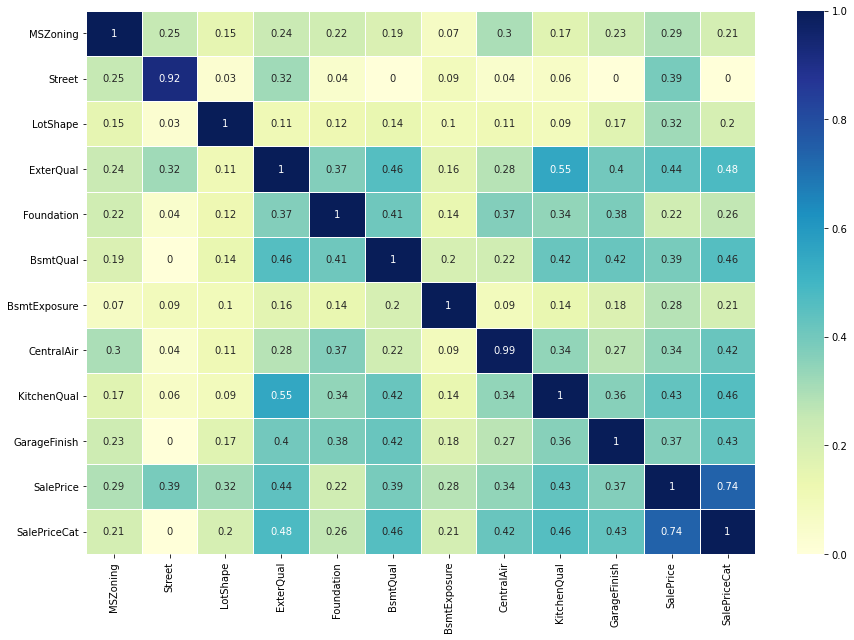

In [28]:
def cramers_v(confusion_matrix):
    #confusion_matrix = pd.crosstab(x,y)
    chi2 = norm.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

rows= []
for i in train_tr.columns:
    cols = []
    #print(train_tr[i])
    for j in train_tr.columns:
        confusion_matrix = pd.crosstab(train_tr[i], train_tr[j])
        #confusion_matrix.values
        cols.append(round(cramers_v(confusion_matrix.values),2))
    rows.append(cols)
cramers_results = np.array(rows)
corr_matrix = pd.DataFrame(cramers_results,columns = train_tr.columns, index =train_tr.columns)

#Plot heatmap to see correlations
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix,linewidths=.5,annot = True, ax=ax,  cmap="YlGnBu")
plt.show()

In [14]:
train_tr = train_tr.drop(['LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
            'Exterior2nd','ExterCond','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtFinType1','BsmtFinType2','Heating','Electrical','Functional','GarageQual','GarageCond','SaleType','SaleCondition'],axis=1)
train_tr = train_tr.drop(['Neighborhood','GarageType','PavedDrive','FireplaceQu','MasVnrType','HeatingQC'],axis=1)
train_tr = train_tr.drop(['Street','LotShape'],axis=1)

In [15]:
train_tr.columns

Index(['MSZoning', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'CentralAir', 'KitchenQual', 'GarageFinish', 'SalePrice',
       'SalePriceCat'],
      dtype='object')

In [57]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

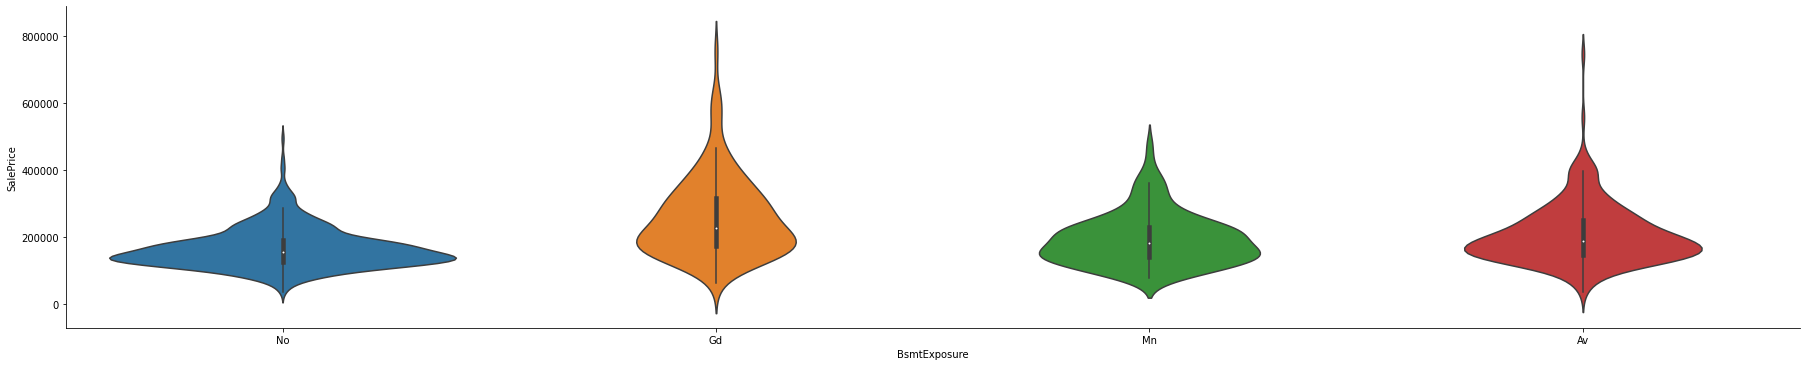

In [43]:
#plot utilities against saleperice
#sns.catplot(data=train_cat,kind="count", x="Utilities",palette="ch:.25", height = 3, aspect=5)
#g = sns.catplot(x="Neighborhood", y="SalePrice", kind="violin", inner=None, data=train_tr)
#sns.swarmplot(x="Neighborhood", y="SalePrice", color="k", size=2, data=train_tr, )
sns.catplot(x="BsmtExposure", y="SalePrice",data=train_df, kind="violin", split=False,height=5, aspect=5);
,# hue="smoker", col="time"

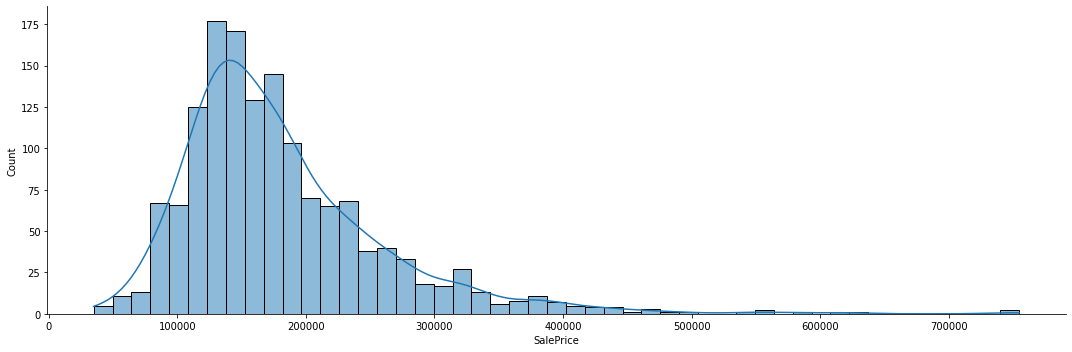

In [38]:
sns.displot(data=train_df, x="SalePrice", kde=True, height = 5, aspect=3)

TypeError: No loop matching the specified signature and casting was found for ufunc add

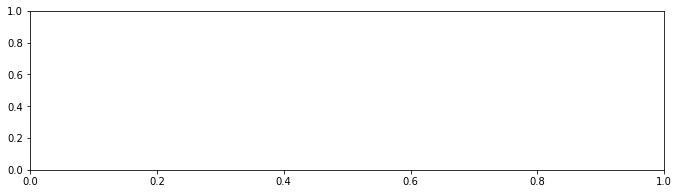

In [31]:
plt.figure(figsize = (25,45))
for i in enumerate(train_tr.columns):
    #print(i[0])
    plt.subplot(13,2,i[0]+1)
    #sns.boxplot(train_tr[i[1]])
    sns.violinplot(x=i[1], y= "SalePrice", data=train_tr)
    plt.xlabel(i[1])    

In [16]:
#Let's first fill missing values for numerical data and scale this data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(train_nm)
imputer.statistics_
X = imputer.transform(train_nm)
train_trf = pd.DataFrame(X,columns=train_nm.columns)


In [17]:
#Again checking missing data
missing_data = train_trf.isnull().sum()
missing_data = missing_data[missing_data>0]
missing_data

Series([], dtype: int64)

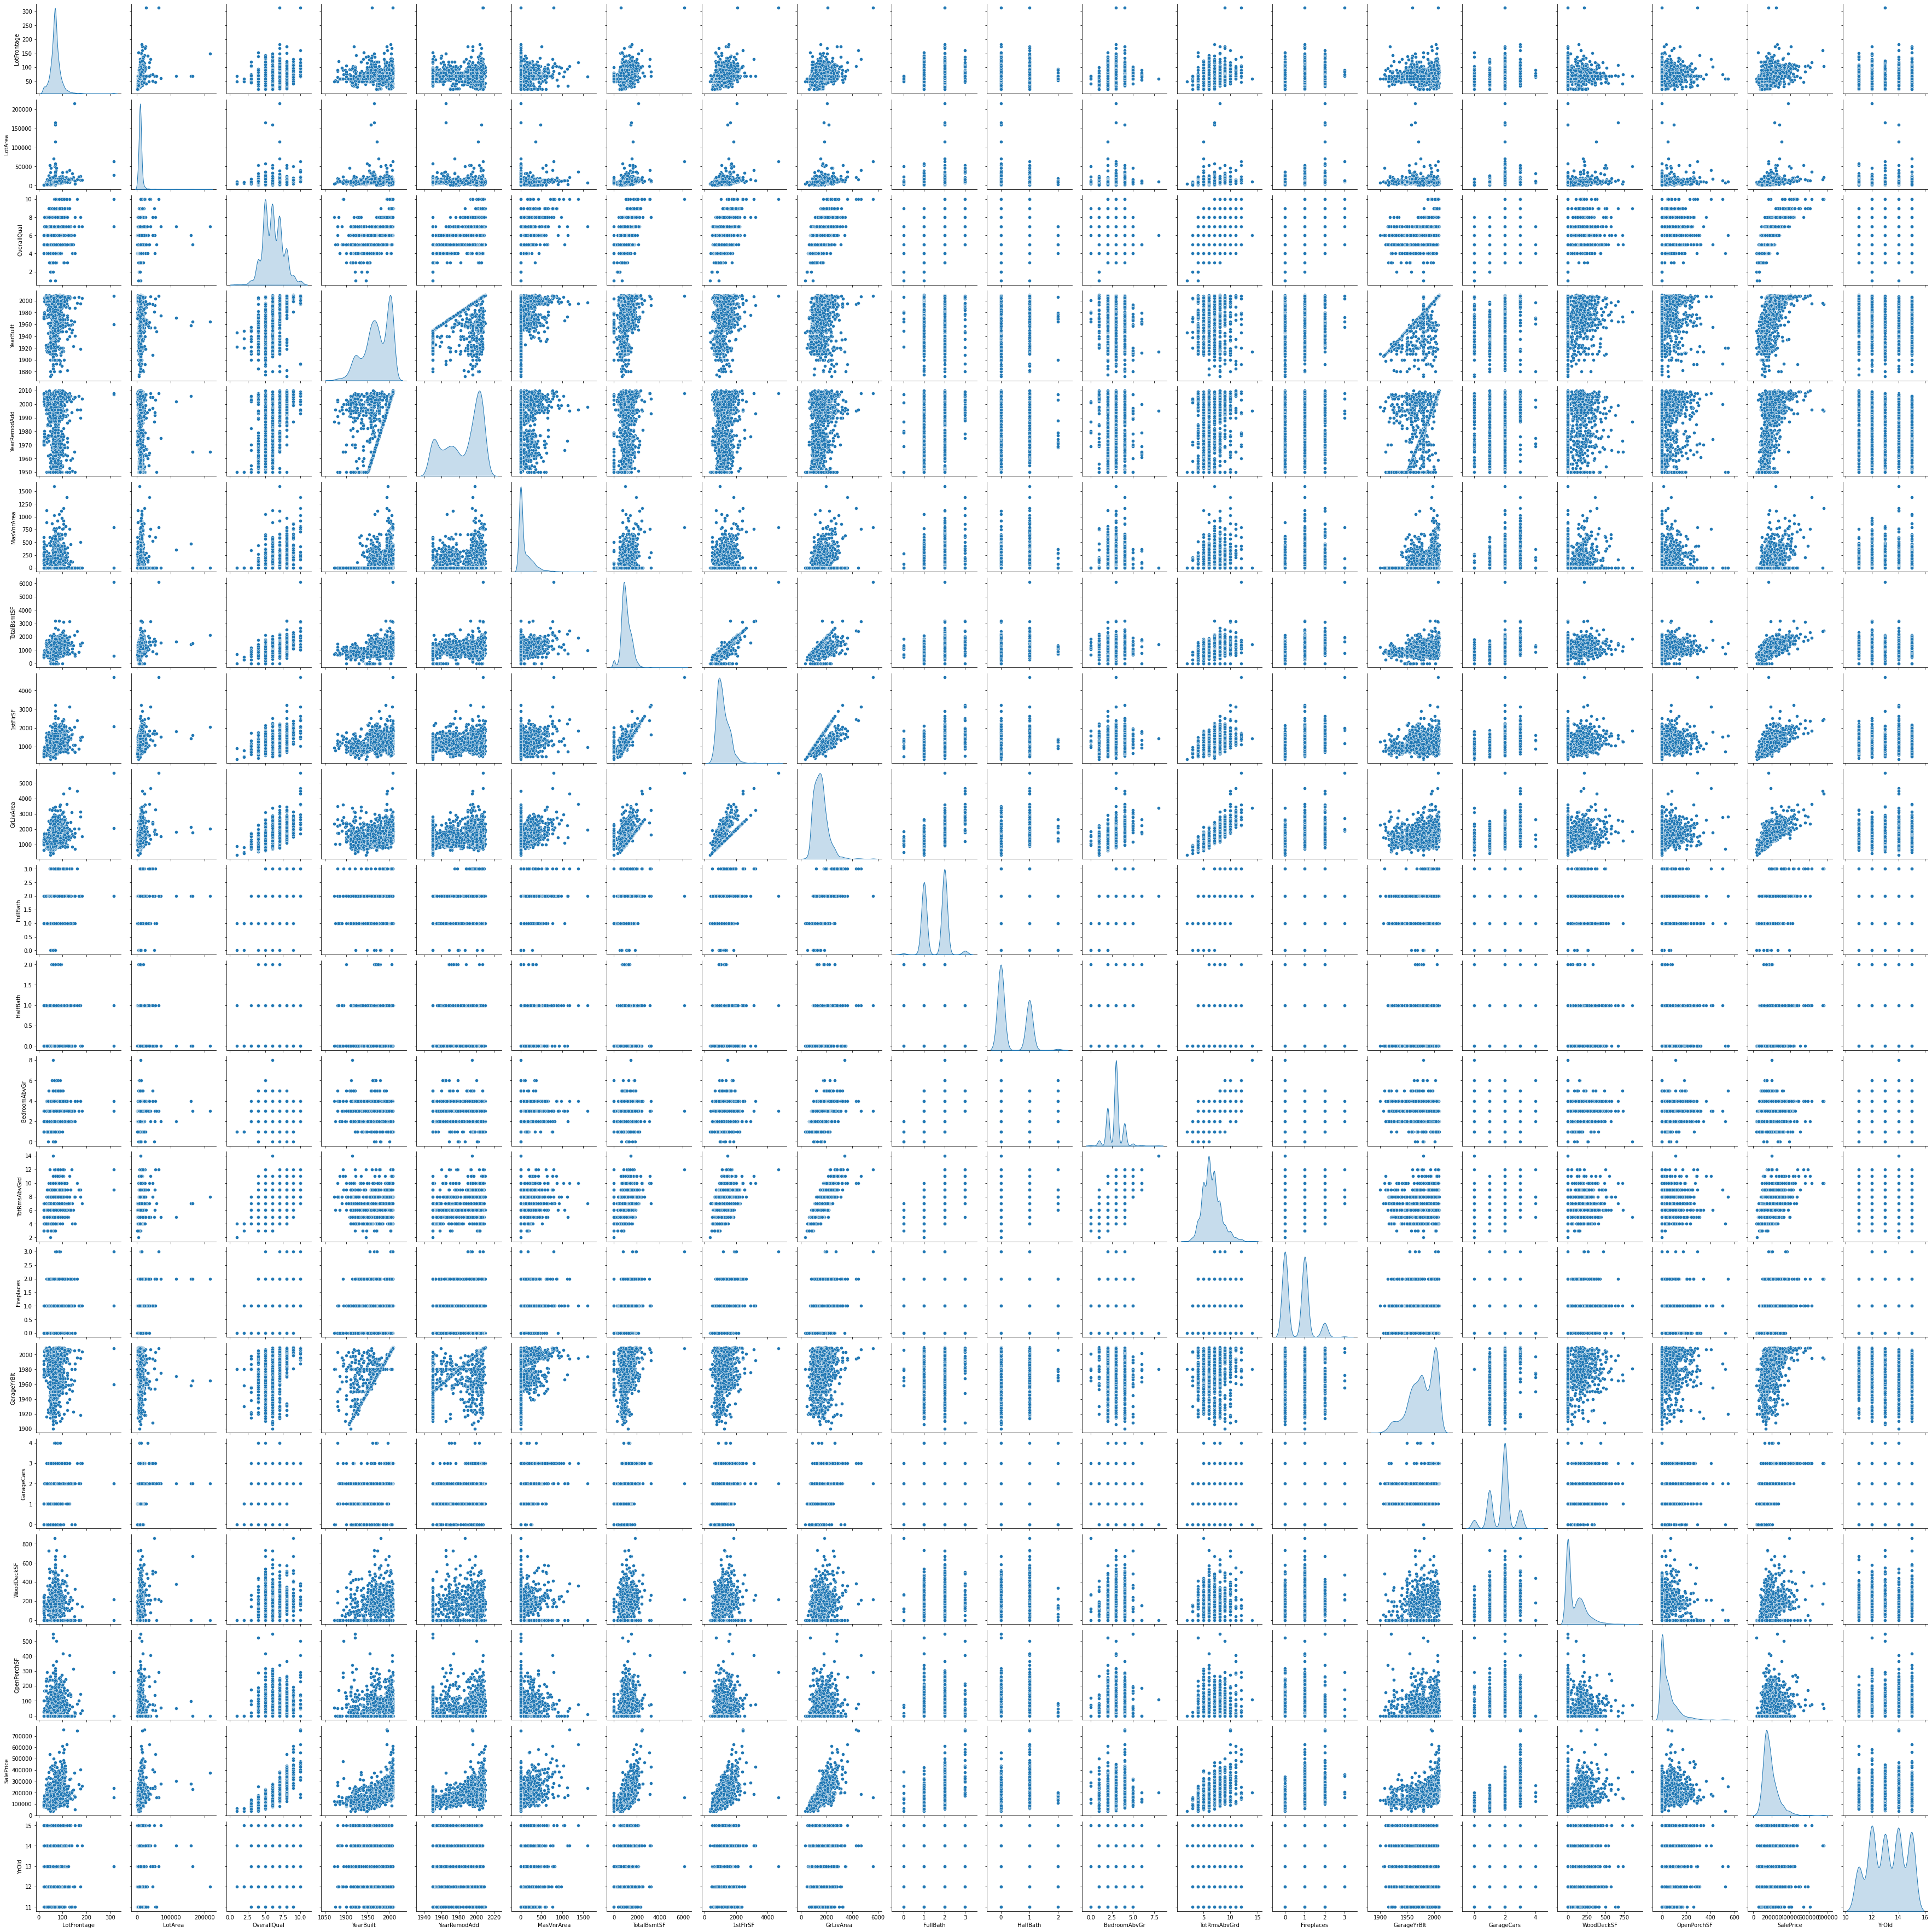

In [41]:
sns.pairplot(train_trf,diag_kind="kde")
plt.show()

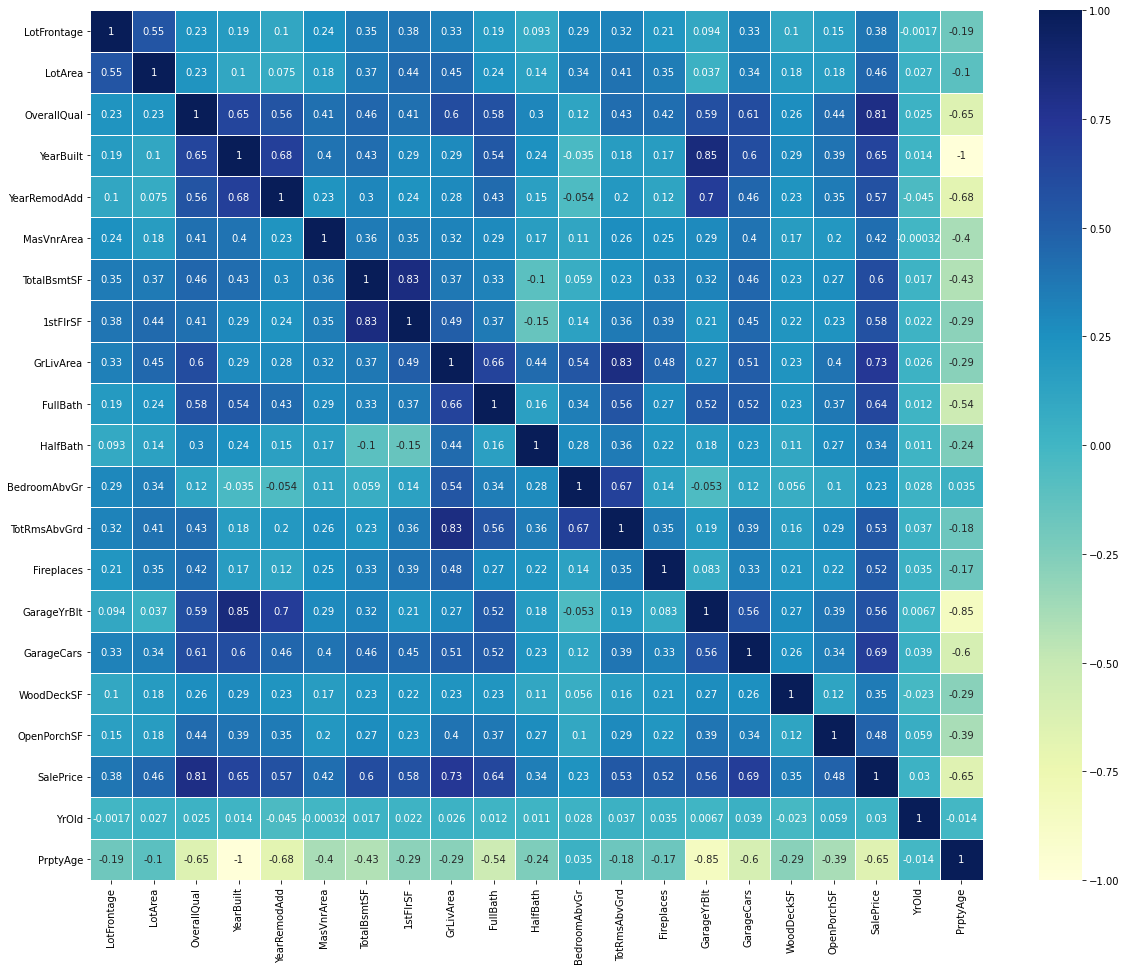

In [52]:
corr_matrix = train_trf.corr(method = 'spearman')
f, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corr_matrix,linewidths=.5,annot = True, ax=ax,  cmap="YlGnBu")
plt.show()

Columns I would drop PoolArea,GarageCars,MoSold,YrSold, GarageYrBlt

In [20]:
train_trf =train_trf.drop(['PoolArea','BsmtFinSF2','MoSold','YrSold','BsmtHalfBath','3SsnPorch','MiscVal','ScreenPorch','EnclosedPorch','OverallCond','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','GarageArea'],axis=1)
#train_nm =train_nm.drop(,axis=1)
train_trf =train_trf.drop(['MSSubClass','KitchenAbvGr','BedroomAbvGr'],axis=1)

In [21]:
#Deleting numerical columns
train_df =train_df.drop(['PoolArea','BsmtFinSF2','MoSold','YrSold','BsmtHalfBath','3SsnPorch','MiscVal','ScreenPorch','EnclosedPorch','OverallCond','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','GarageArea'],axis=1)

train_df =train_df.drop(['MSSubClass','KitchenAbvGr','YearBuilt','BedroomAbvGr'],axis=1)

#deleting categorical columns
train_df = train_df.drop(['LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
            'Exterior2nd','ExterCond','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtFinType1','BsmtFinType2','Heating','Electrical','Functional','GarageQual','GarageCond','SaleType','SaleCondition'],axis=1)
train_df = train_df.drop(['Neighborhood','GarageType','PavedDrive','FireplaceQu','MasVnrType','HeatingQC','Street','LotShape'],axis=1)

In [22]:
train_df.head()

,MSZoning,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,...,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,YrOld
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,8450,7,2003,196.0,Gd,PConc,Gd,No,...,Gd,8,0,2003.0,RFn,2,0,61,208500,18
2,RL,80.0,9600,6,1976,0.0,TA,CBlock,Gd,Gd,...,TA,6,1,1976.0,RFn,2,298,0,181500,45
3,RL,68.0,11250,7,2002,162.0,Gd,PConc,Gd,Mn,...,Gd,6,1,2001.0,RFn,2,0,42,223500,20
4,RL,60.0,9550,7,1970,0.0,TA,BrkTil,TA,No,...,Gd,7,1,1998.0,Unf,3,0,35,140000,106
5,RL,84.0,14260,8,2000,350.0,Gd,PConc,Gd,Av,...,Gd,9,1,2000.0,RFn,3,192,84,250000,21


<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

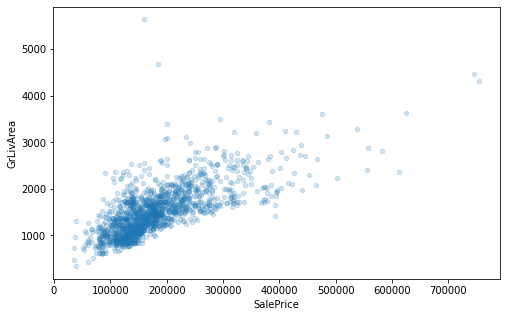

In [36]:
train_trf.plot(kind="scatter", x="SalePrice", y="GrLivArea", alpha= 0.2, figsize=(8,5))

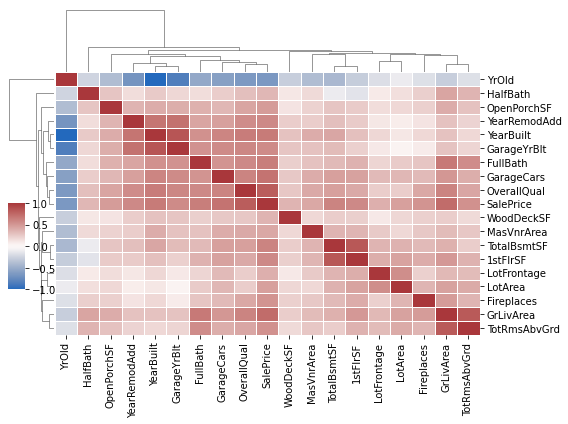

In [24]:
# Draw the full plot
g = sns.clustermap(train_trf.corr(method = 'spearman'), center=0, cmap="vlag",
                    dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(8, 6))

#g.ax_row_dendrogram.remove()